In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [81]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [67]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [87]:
data.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
data.shape

(1338, 7)

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [82]:
# ---- Histogram (Distribution of Charges) ----
def perform_Histogram(data):
    """
    Generates and displays a histogram for the 'charges' column in the provided dataset.
    data (DataFrame): The dataset containing the 'charges' column.
    Returns:
    None
    """

    mean_value = round(data['charges'].mean(), 2)
    median_value = round(data['charges'].median(), 2)
    std_dev = round(data['charges'].std(), 2)
    skewness = round(data['charges'].skew(), 2)
    kurt = round(data['charges'].kurtosis(), 2)
    
    print(mean_value,median_value,std_dev,skewness , kurt)
    
    plt.figure(figsize=(8, 6))
    plt.hist(data['charges'], bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribution of Charges", fontsize=16)
    plt.xlabel("Charges", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.show()

13270.42 9382.03 12110.01 1.52 1.61


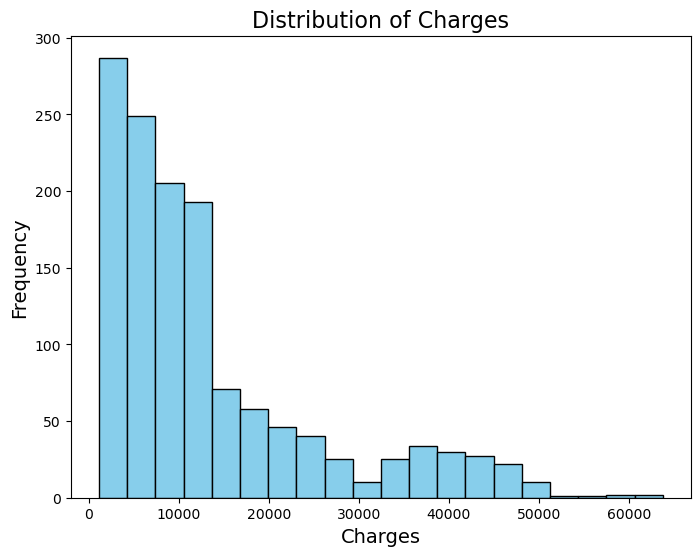

In [46]:
perform_Histogram(data)

In [88]:
# Define the independent variable (X) and dependent variable (y)
X = data['bmi']
y = data['charges']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = ss.linregress(X, y)

# Define the regression line
regression_line = slope * X + intercept

# Calculate confidence intervals
confidence_interval = 1.96 * std_err

# Plot the data points and the regression line with confidence intervals and error bars
def linear_regression(data):
    """ 
    Plots the data points along with the regression line, 
    confidence intervals, and error bars.  
    DataFrame: A DataFrame containing the columns 'BMI' and 'Charges'
    to be used for plotting. Returns: None: This function will plot 
    the scatter plot, regression line, confidence interval, and error bars. 
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X, y=y, label='Data points')
    plt.plot(X, regression_line, color='red', label='Regression line')
    plt.fill_between(X, regression_line - confidence_interval, regression_line + confidence_interval, color='red', alpha=0.2, label='Confidence interval')
    plt.errorbar(X, y, yerr=confidence_interval, fmt='o', ecolor='gray', alpha=0.5, label='Error bars')

    # Add labels and title
    plt.xlabel('BMI')
    plt.ylabel('Charges')
    plt.title('Regression Analysis with Confidence Interval and Error Bars')
    plt.legend()

    # Show the plot
    plt.show()

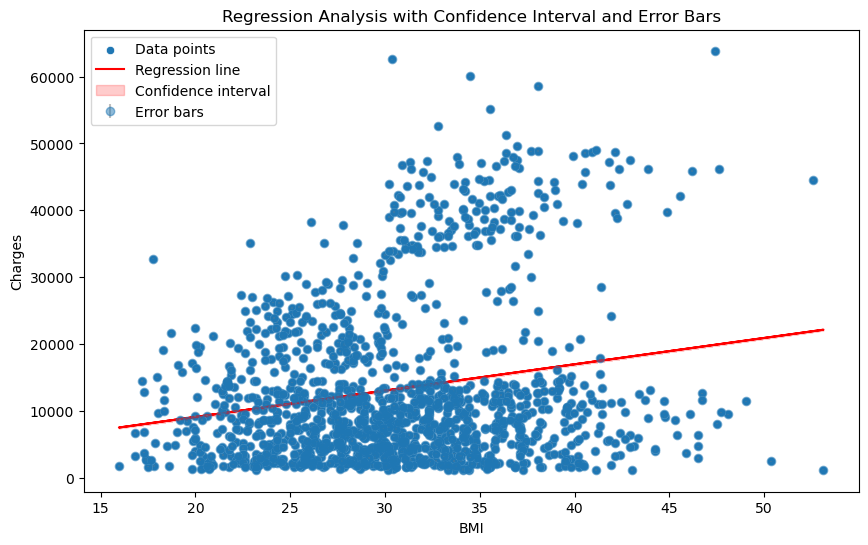

In [89]:
linear_regression(data)

In [48]:
#---heatmap and correlation matrix
# Ensure non-numeric columns are excluded from the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
def perform_Heatmap(data):
    """
    Generates and displays a heatmap for the correlation matrix of the numeric columns in the provided dataset.
    data (DataFrame): The dataset containing numeric columns to be used for the correlation matrix.
    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap", fontsize=16)
    plt.show()


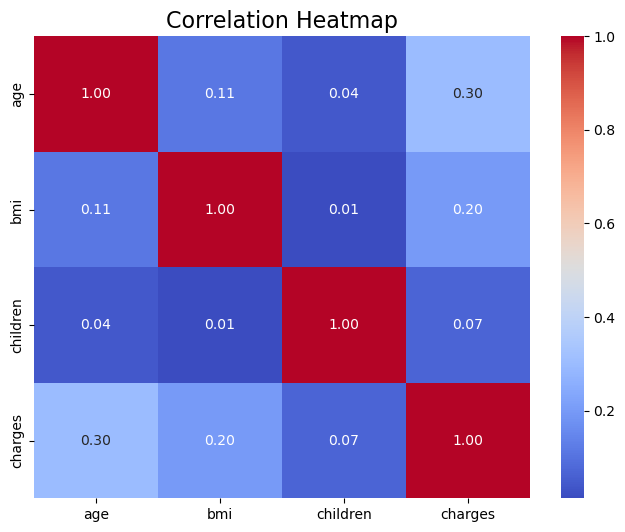

In [31]:
perform_Heatmap(data)

In [74]:
# ----K-means Clustering ----
# Normalize the data for clustering
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[['age', 'bmi', 'charges']])

# Elbow Plot to determine optimal clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)
def elbowplot(data):
    """
    Generates and displays an elbow plot to determine the optimal number of clusters for K-means clustering.
    
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), sse, marker='o', color='red')
    plt.title("Elbow Method for Optimal Clusters", fontsize=16)
    plt.xlabel("Number of Clusters", fontsize=14)
    plt.ylabel("SSE (Sum of Squared Errors)", fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

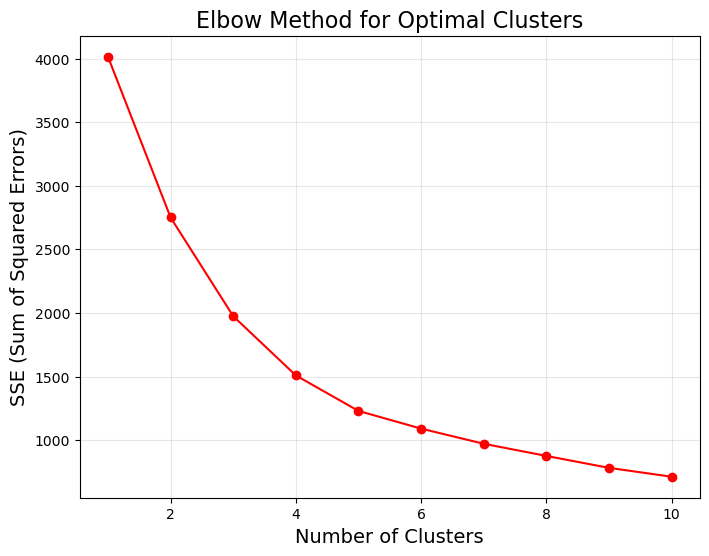

In [37]:
elbowplot(data)

In [75]:
# Apply k-means clustering with an optimal number of clusters (e.g., 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(normalized_data)

# Scatter Plot: Clusters based on Age and Charges with centroids
def scatterplot_with_centroids(data, kmeans):
    """
    Creates a scatter plot of clusters based on Age and Charges with centroids.
   the features 'age', 'charges', and the 'Cluster' labels 
        generated by k-means clustering.
    kmeans : sklearn.cluster.KMeans data : pandas.DataFrame
        The dataset containing 
        The k-means clustering model containing the fitted centroids.

    Returns:
    --------
    None
        Displays a scatter plot with clusters and centroids.

    Features:
    ---------
    - Scatter plot of Age vs. Charges, color-coded by cluster.
    - Highlights cluster centroids as red 'X' markers on the plot.
    """
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data['age'], y=data['charges'], hue=data['Cluster'], palette="viridis", s=100)
    
    # Plot centroids
    centroids = kmeans.cluster_centers_
    centroids_original = scaler.inverse_transform(centroids)
    plt.scatter(centroids_original[:, 0], centroids_original[:, 2], s=300, c='red', marker='X', label='Centroids')
    
    plt.title("Clusters by Age and Charges", fontsize=16)
    plt.xlabel("Age", fontsize=14)
    plt.ylabel("Charges", fontsize=14)
    plt.legend(title="Cluster")
    plt.grid(alpha=0.3)
    plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


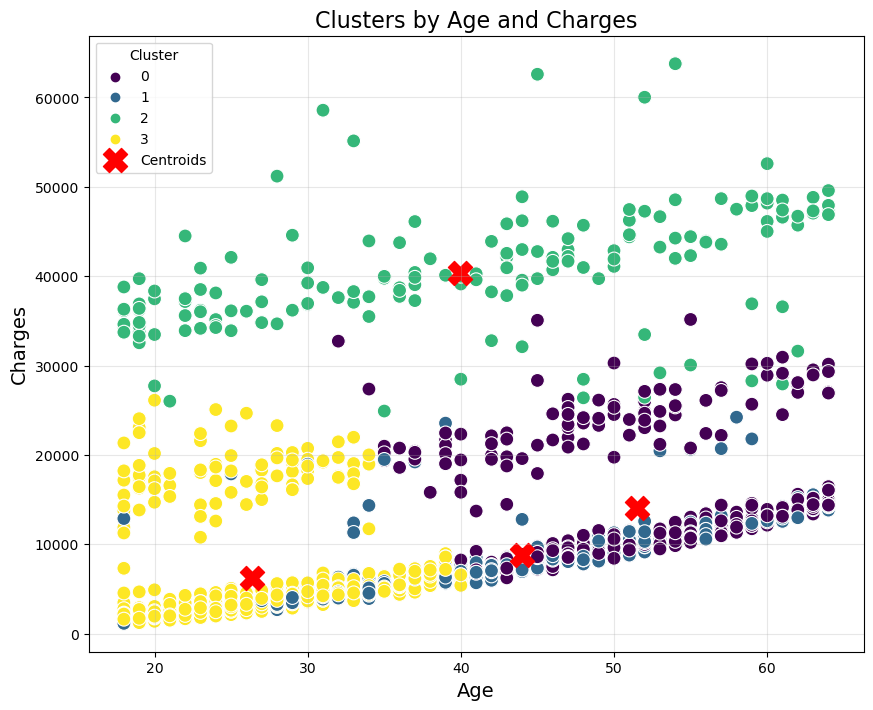

In [52]:
scatterplot_with_centroids(data, kmeans)

ValueError: operands could not be broadcast together with shapes (1338,) (402,) 